### 데이터 로딩 및 라이브러리 import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import Image  # 주피터 노트북에 이미지 삽입
import seaborn as sns
import matplotlib.ticker as ticker # plt 축의 tik(눈금, 틱) 

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

df = pd.read_csv('Data/diabetes.csv')
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


* Pregnancies : 임신횟수  
* Glucose : 경구 포도당 내성검사 2시간 혈장 포도당 농도 (140미만 정상, 140-199 내당능장애, 200이상 당뇨병)
* BloodPressure : 이완기 혈압 (mmHg)
* SkinThickness : 팔 삼두근 뒤쪽의 피하지방 측정값 (mm)
* Insulin : 2시간 혈청 인슐린(mu U/mL)
* BMI : 체질량지수(체중(kg) / 키(cm)^2)
* DiabetesPedigreeFunction : 당뇨 직계 가족력
* Age : 나이
* Outcome : 5년이내 당뇨병 발병여부 (0 또는 1)    

### 머신러닝 완벽 가이드 동영상 캡쳐 자료 (권철민 저)
<img src="img/ml_process.png" width="800" height="600">

### 데이터 전처리 
* 탐색적 방법
    * df.info() : length, not null(결측치), data type
    * df.describe() : 4분위, 통계(statics)
    * plot : 시각적 분포(histogram,swarmplot, boxplot(이상치))
    * zero 0값 찾기
### 탐색적 방법을 ==> pandas_profiling에서 제공함 
* Boxplot이상치는 제공치 않으나 warning기능으로 계측치, 무한값, 0값, feature간 상관관계 제공
* 각종 통계를 상세히 제공

#### 탐색적 방법

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe() # 통계의 4분위

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


####  1. seaborn 통해 전체 데이터 분포 탐색 
+ pairplot, heatmap을 통해 상관관계를 파악
+ heatmap (-1 ~ +1) 0.5이상 상관계수가 나오면 다중공선성 발생 의심
+ boxplot은 4분위수를 이용한 이상치 검출( 최대값 3분위수 IQR*1.5, 최소값 1분위수 - 1.5*IQR)

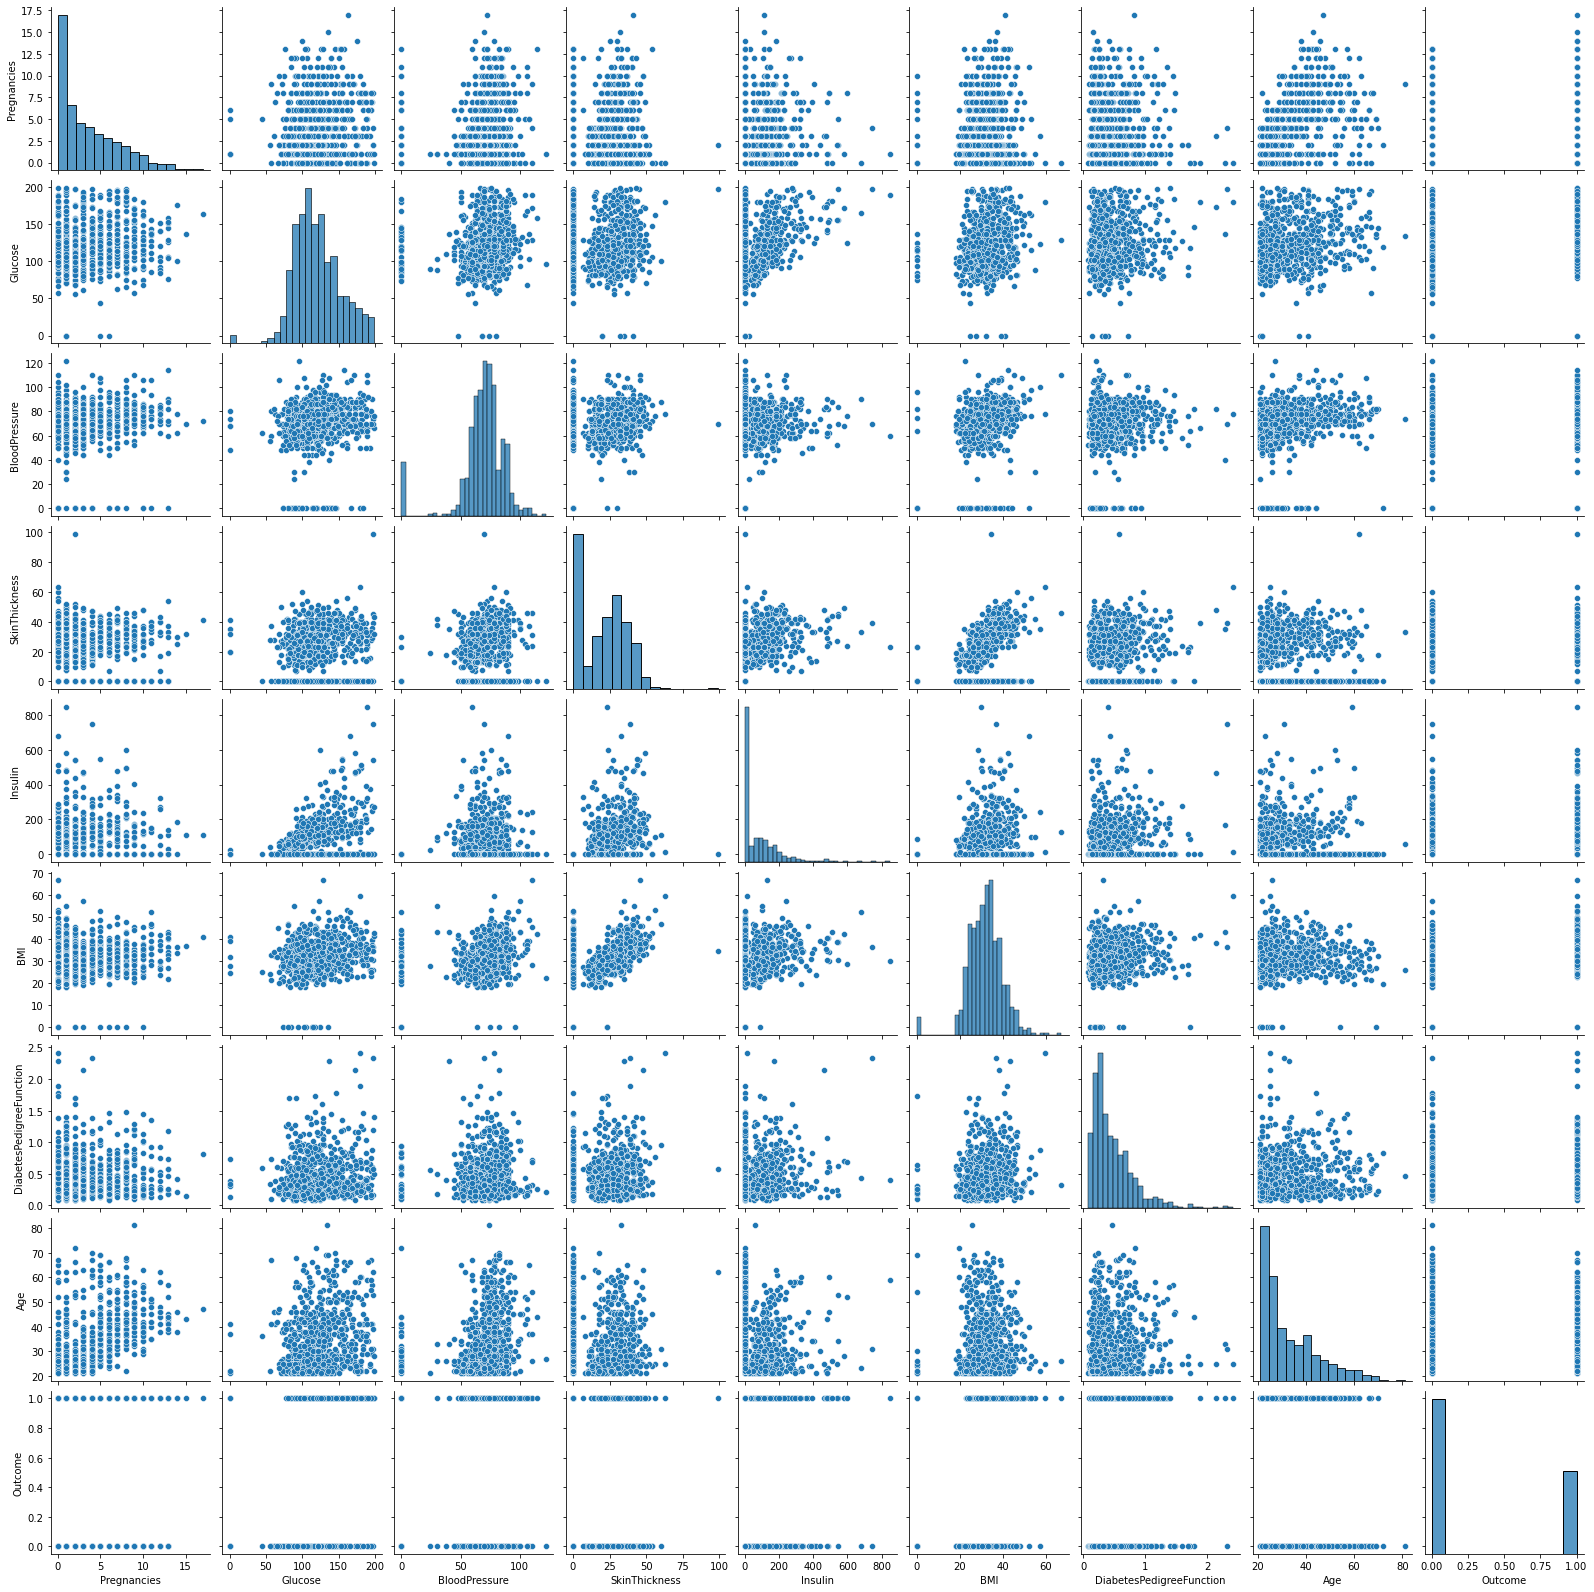

In [6]:
sns.pairplot(df)

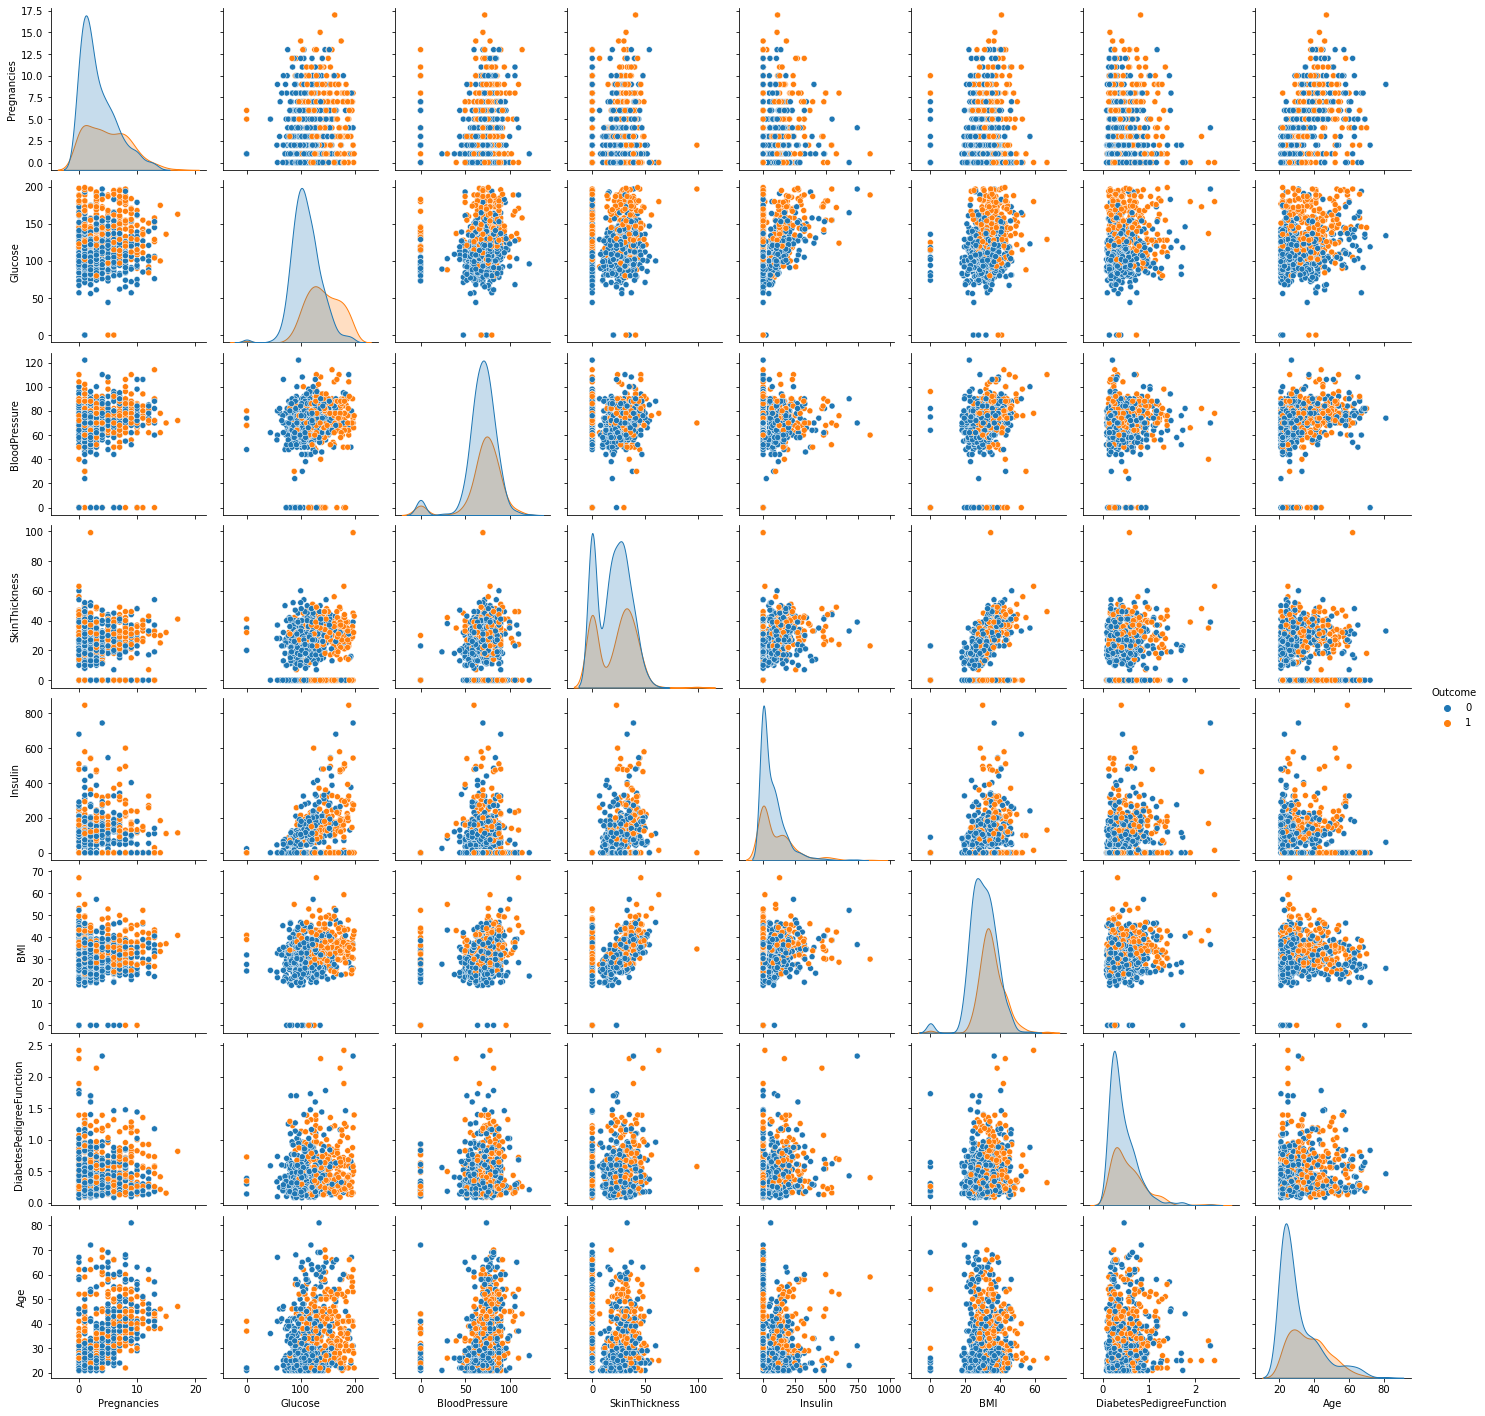

In [7]:
# 당뇨병 진단 class Outcome에 대해     0 : 파란색, 1 : 주황색
sns.pairplot(df, hue= 'Outcome') 

#### 0-1 heatmap 상관계수 수치화

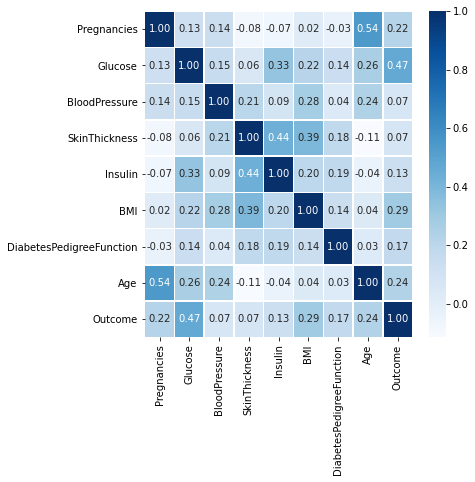

In [8]:
# 상관관계 : 두 변수간 선형관계 척도, 단순선형회귀에 가능, 다중선형회귀에는 쓰이지 않음
# 'Outcome'과 ['Pregnancies','Glucose', 'BMI','DiabetesPedigreeFunction', 'age' ] 높다 
plt.figure(figsize=(6,6))
sns.heatmap(data = df.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

####  0-2 변수들(feature)간의  상관관계

C:\Users\spiso\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


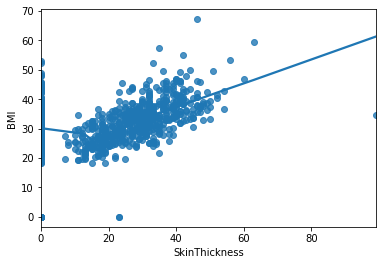

In [9]:
## 산점도, 추세선 lowess)
sns.regplot('SkinThickness', 'BMI', lowess=True, data = df)

C:\Users\spiso\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\spiso\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 576x432 with 0 Axes>

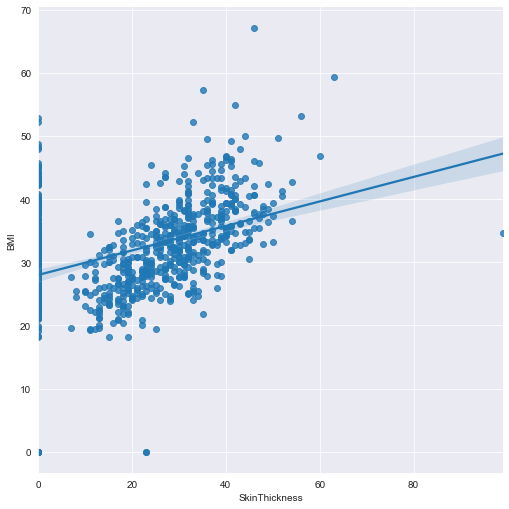

In [10]:
plt.figure(figsize=(8,6))
sns.set_style("darkgrid")
sns.lmplot('SkinThickness', 'BMI', data = df, size=7)

#### 0-3. 정규분표 여부
* 선형회귀에서 독립변수나 종속변수 모두 기본적 정규분포를 따라야 함 (statsmodels 모델의 타당성 검증항목)
* logisticregression모델 [ 종속변수가 0, 1 이항분포]일 경우에도  독립변수들은 정규분포를 따라야 함
* ===>  데이터분리 전후 scalier 선택(정규분포를 따르도록)해야 하는  이유

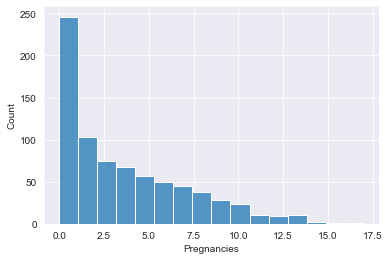

In [11]:
# Non-parametric 밀도추정
sns.histplot(df['Pregnancies'])

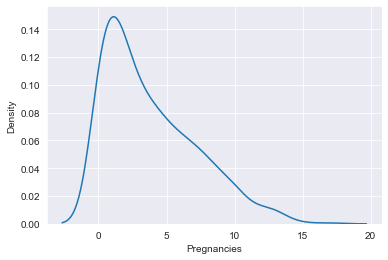

In [12]:
# 커널밀도곡선(pdf 확률밀도함수: 변수 x의 밀도를 추정하는 것, 커널함수 사용) 0의 위치가 이동한 것임 
sns.kdeplot(df['Pregnancies'])

C:\Users\spiso\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


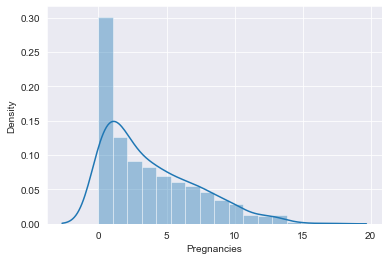

In [13]:
sns.distplot(df['Pregnancies'])

#### 0-3-1 Outcome이 가장 상관관계가 높은 Glucose과 비교

C:\Users\spiso\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\spiso\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


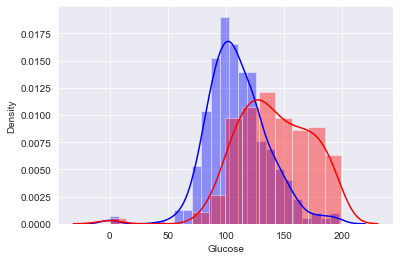

In [14]:
sns.distplot(df[df['Outcome'] == 0]['Glucose'], color="blue")
sns.distplot(df[df['Outcome'] == 1]['Glucose'], color="red")

#### 0-4  target(class)값의 분포 
* 회귀(regression) 수치예측이므로 target(class)가 정규분포를 이루고 있어야 한다
    + scalier적용(stand, minmax, robust, log)
* 분류에서도 cross validation 필요여부 확인 => 데이터 분리시 kfold, stratity=y 적용 여부 판단
    + pima Outcome은 0, 1로 이진분류모델을 선택해야 좋은 모델이 될 것으로 판단

In [15]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

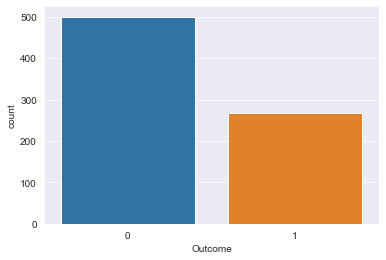

In [16]:
sns.countplot(x='Outcome', data=df)

#### 0-4-1 분류모델에서 target값의 분포가 균일하지 못한 경우 iris

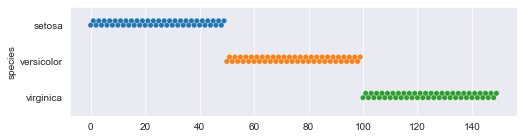

In [17]:
plt.figure(figsize=(8,2))
iris=sns.load_dataset('iris')
sns.swarmplot(x=iris.index, y=iris['species']) # cv (Cross Validation ) 필요 ==> StratifiedKFold

#### 0-4-2 X축 index놓고 Outcome 분포도 보기

In [18]:
## sample
# sns.scatterplot(x='petal_length', 
#                 y='petal_width', 
#                 hue='species', # different colors by group
#                 style='species', # different shapes by group
#                 s=100, # marker size
#                 data=iris)
# plt.show()
# 출처: https://rfriend.tistory.com/414 [R, Python 분석과 프로그래밍의 친구 (by R Friend)]

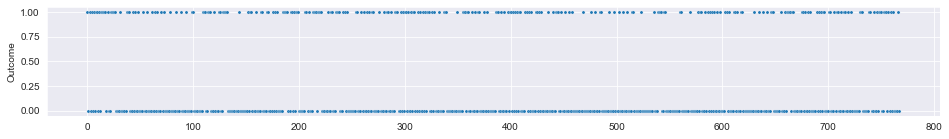

In [19]:
## X축 index 전체인데도 실행시간이 짧다
plt.figure(figsize=(16,2))
sns.scatterplot(x=df.index, y=df['Outcome'], s=10 )

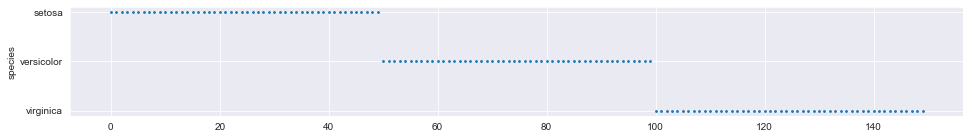

In [21]:
# iris 불균형
plt.figure(figsize=(16,2))
sns.scatterplot(x=iris.index, y=iris['species'], s=10 )

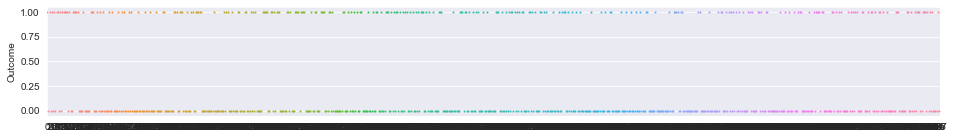

In [22]:
# color표현 # X축 index 전체 stripplot (실행시간이 오래걸림) # swarmplot도 동일
plt.figure(figsize=(16,2))
sns.stripplot(x=df.index,y=df['Outcome'], s=2 )

### 1. 이상치, 극단치, outliner
#### boxplot : 통계의 4분위 그림 : 해석방법 
* https://codedragon.tistory.com/7012
* BOXplot 최대값, 최소값 선정기준
    + 최대값 : 3/4분위수 + 1.5*IQR  [cf) IQR = 3/4분위수 - 1/4분위수]
    + 최소값 : 1/4분위수 - 1.5*IQR  [cf) IQR = 3/4분위수 - 1/4분위수]
* 최대값, 최소값을 벗어나면 이상치로 표시

C:\Users\spiso\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


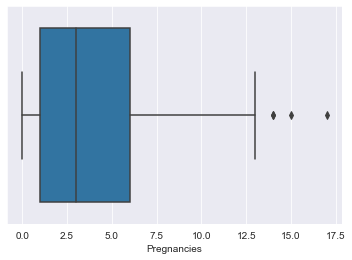

In [23]:
## feature 1개
plt.figure(figsize=(6,4))
sns.boxplot(df['Pregnancies'])

#### feature 2개 # age대비 통계의 4분위 boxplot를 통해 확인

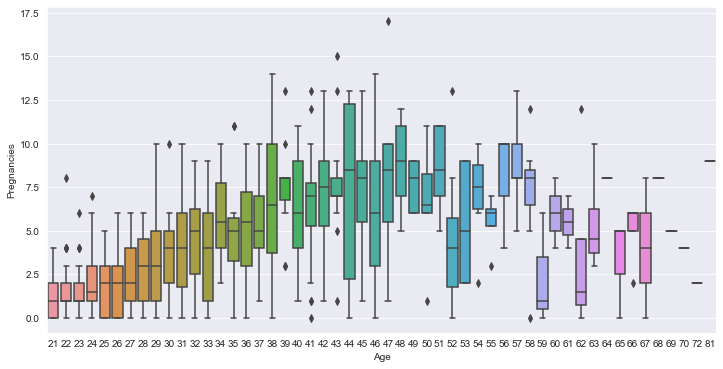

In [24]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Age', y='Pregnancies', data=df )

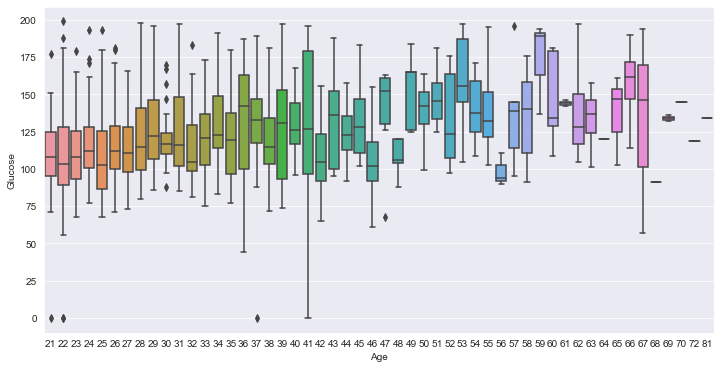

In [25]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Age', y='Glucose', data=df )

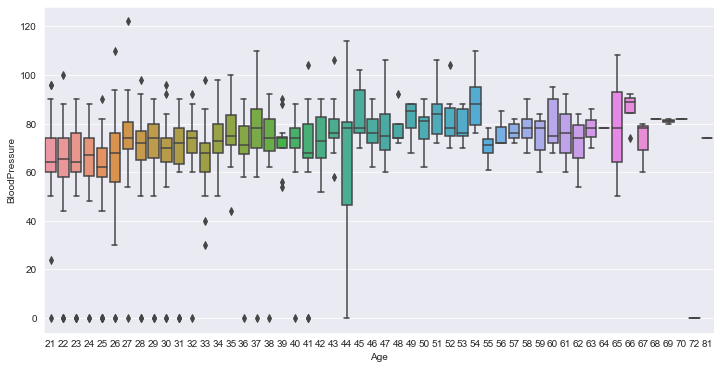

In [26]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Age', y='BloodPressure', data=df )

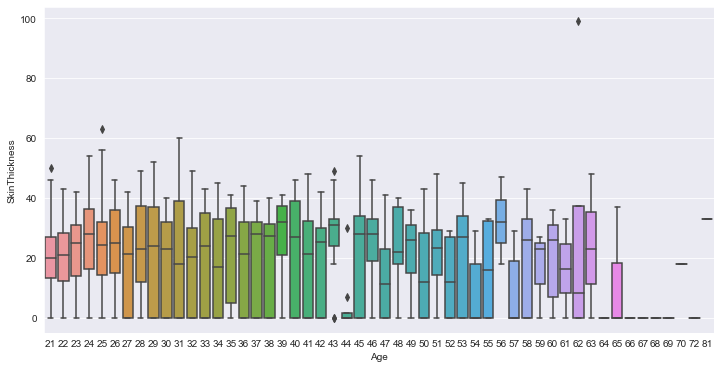

In [27]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Age', y='SkinThickness', data=df )

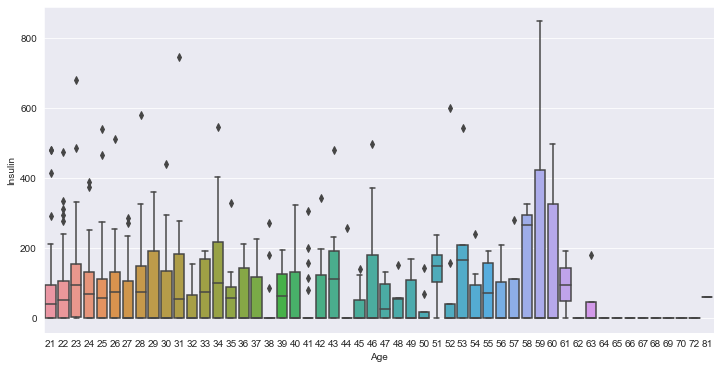

In [28]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Age', y='Insulin', data=df )

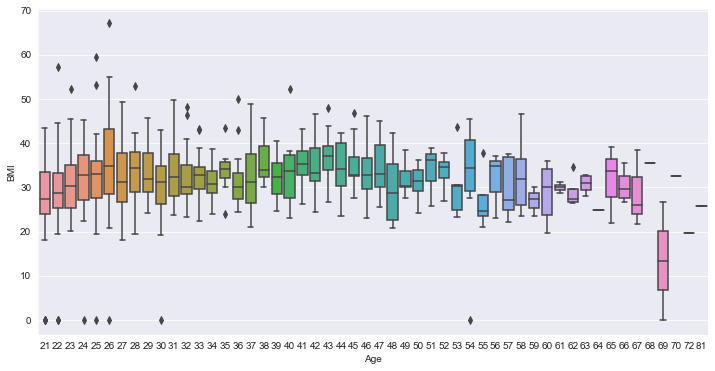

In [29]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Age', y='BMI', data=df )

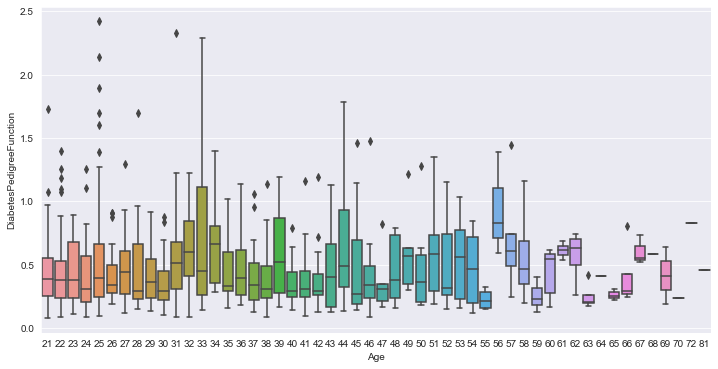

In [30]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Age', y='DiabetesPedigreeFunction', data=df )

#### X축 Age (연속 또는 시간)적 데이터,  boxplot striplot 같이 표현
+ http://hleecaster.com/python-seaborn-color/
+ https://m.blog.naver.com/kiddwannabe/221859089534

#### sample

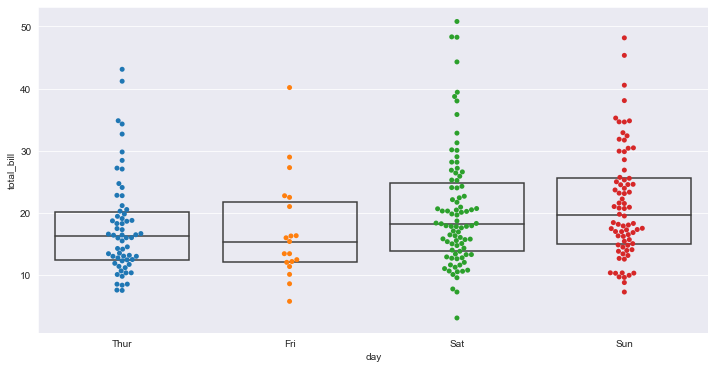

In [37]:
import seaborn as sns
tips = sns.load_dataset("tips")
plt.figure(figsize=(12,6))
sns.swarmplot(data=tips, x="day", y="total_bill")
sns.boxplot(data=tips, x="day", y="total_bill",  
            showcaps=False,             # 박스 상단 가로라인 보이지 않기
            whiskerprops={'linewidth':0}, # 박스 상단 세로 라인 보이지 않기 
            showfliers=False,           # 박스 범위 벗어난 아웃라이어 표시하지 않기
            boxprops={'facecolor':'None'}, # 박스 색상 지우기
        )
# https://m.blog.naver.com/kiddwannabe/221859089534

#### 2개 feature  :   X축 Age (연속 또는 시간)적 데이터, Y 대상 

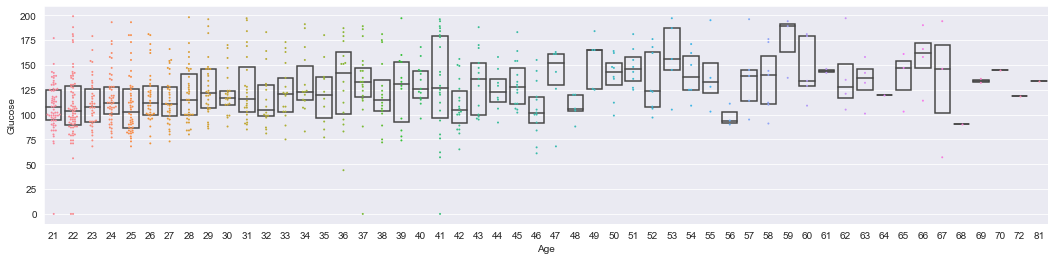

In [61]:
plt.figure(figsize=(18,4))
sns.swarmplot(data=df, x="Age", y="Glucose",s=2) # 더 간소화 stripplot
sns.boxplot(data=df, x="Age", y="Glucose",  
            showcaps=False,             # 박스 상단 가로라인 보이지 않기
            whiskerprops={'linewidth':0}, # 박스 상단 세로 라인 보이지 않기 
            showfliers=False,           # 박스 범위 벗어난 아웃라이어 표시하지 않기
            boxprops={'facecolor':'None'}, # 박스 색상 지우기
        )

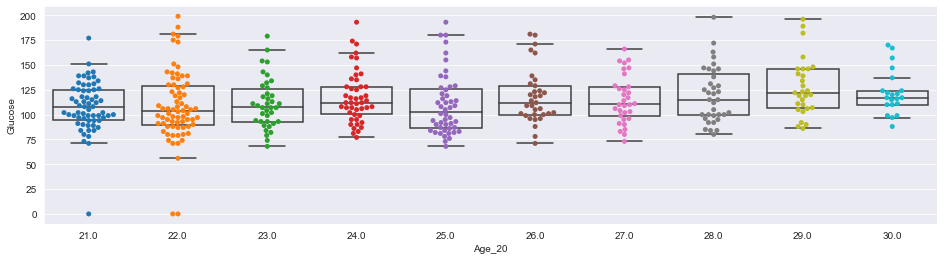

In [62]:
df['Age_20'] = df[ (df['Age'] >=21) & (df['Age']<=30) ]['Age']
# df['Age_20'] = df[ (df['Age'] >=21) and (df['Age']<=30) ]['Age'] # error
df['Age_20']

plt.figure(figsize=(16,4))
sns.swarmplot(data=df, x='Age_20', y="Glucose",s=5) # 더 간소화 stripplot
sns.boxplot(data=df, x="Age_20", y="Glucose",  
            showcaps=True,             # 박스 상단 가로라인(최대, 최소) 보이지 않기
            whiskerprops={'linewidth':0}, # 박스 상단 세로 라인 보이지 않기 
            showfliers=False,           # 박스 범위 벗어난 아웃라이어 표시하지 않기
            boxprops={'facecolor':'None'}, # 박스 색상 지우기
        )

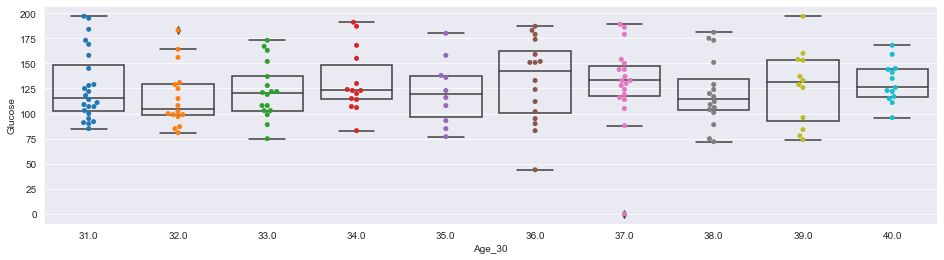

In [63]:
df['Age_30'] = df[ (df['Age'] >=31) & (df['Age']<=40) ]['Age']
df['Age_30']

plt.figure(figsize=(16,4))
sns.swarmplot(data=df, x='Age_30', y="Glucose",s=5) # 더 간소화 stripplot
sns.boxplot(data=df, x="Age_30", y="Glucose",  
            showcaps=True,             # 박스 상단 가로라인(최대, 최소값) 표시
            whiskerprops={'linewidth':0}, # 박스 상단 세로 라인 보이지 않기 
            showfliers=True,           # 박스 범위 벗어난 아웃라이어 표시
            boxprops={'facecolor':'None'}, # 박스 색상 지우기
        )

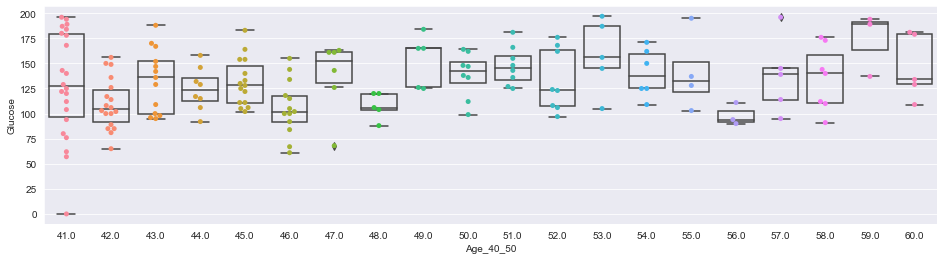

In [64]:
df['Age_40_50'] = df[ (df['Age'] >=41) & (df['Age']<=60) ]['Age']
plt.figure(figsize=(16,4))
sns.swarmplot(data=df, x='Age_40_50', y="Glucose",s=5) # 더 간소화 stripplot
sns.boxplot(data=df, x="Age_40_50", y="Glucose",  
            showcaps=True,             # 박스 상단 가로라인(최대, 최소값) 표시
            whiskerprops={'linewidth':0}, # 박스 상단 세로 라인 보이지 않기 
            showfliers=True,           # 박스 범위 벗어난 아웃라이어 표시
            boxprops={'facecolor':'None'}, # 박스 색상 지우기
        )

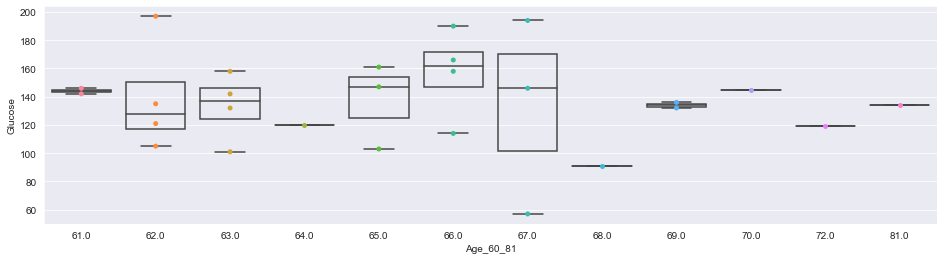

In [65]:
df['Age_60_81'] = df[ (df['Age'] >=61) & (df['Age']<=81) ]['Age']
plt.figure(figsize=(16,4))
sns.swarmplot(data=df, x='Age_60_81', y="Glucose",s=5) # 더 간소화 stripplot
sns.boxplot(data=df, x="Age_60_81", y="Glucose",  
            showcaps=True,             # 박스 상단 가로라인(최대, 최소값) 표시
            whiskerprops={'linewidth':0}, # 박스 상단 세로 라인 보이지 않기 
            showfliers=True,           # 박스 범위 벗어난 아웃라이어 표시
            boxprops={'facecolor':'None'}, # 박스 색상 지우기
        )

In [66]:
##### scatterplot 같이 했는데 이상하게 나옴

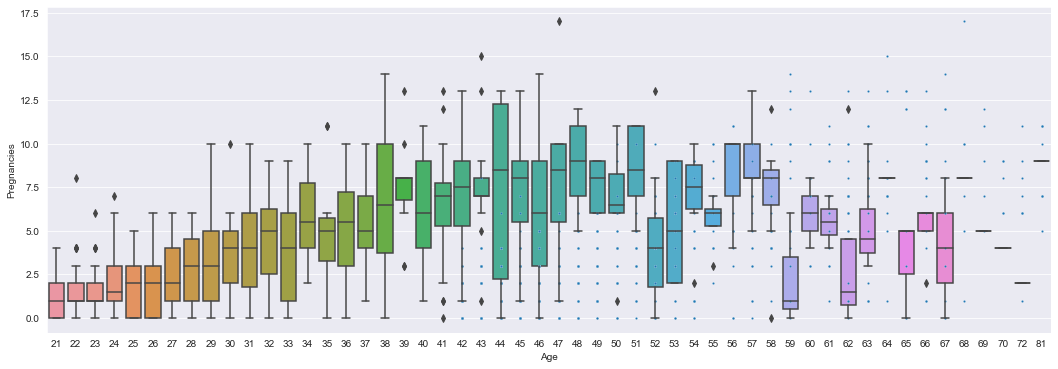

In [67]:
plt.figure(figsize=(18,6))
sns.scatterplot(x=df['Age'],y=df['Pregnancies'],s=5,data=df)
sns.boxplot(x='Age', y='Pregnancies', data=df )

In [68]:
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_20,Age_30,Age_40_50,Age_60_81
0,6,148,72,35,0,33.6,0.627,50,1,NaN,NaN,50.0,NaN
1,1,85,66,29,0,26.6,0.351,31,0,NaN,31.0,NaN,NaN
2,8,183,64,0,0,23.3,0.672,32,1,NaN,32.0,NaN,NaN


In [69]:
# 새로 만든 column 삭제
df.drop(df[['Age_20','Age_30','Age_40_50','Age_60_81']], axis=1, inplace=True)

In [71]:
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


### 2.  0값에 대한 검사 및 처리
* 0값 검사
    + isnull().sum()  isna().sum()
    + (df == 0).sum(axis=0)
    + ================> profiling에서 warning으로  명확히 보여줌
* 0값 처리
    + 일괄 평균값이나 중앙값으로 대체
    + 분류모델에서는 target값들(group)에 대해 평균값(중앙값)으로 대체

#### 일괄 평균값으로 대체(중앙값도 가능)
* boxplot상 이상치는 pima indians들 상황에서 나올 수 있는 데이터이고
* feature수가 적고 데이터가 귀중하여 일괄 대체도 가능?

In [72]:
# 0값의 분포 # 아래명령어도 확인가능하나 0값이 없다고 나옴 # 
print(df.isna().sum()) # df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


                            0
Pregnancies               111
Glucose                     5
BloodPressure              35
SkinThickness             227
Insulin                   374
BMI                        11
DiabetesPedigreeFunction    0
Age                         0
Outcome                   500
                          Zeros Count
Pregnancies                       111
Glucose                             5
BloodPressure                      35
SkinThickness                     227
Insulin                           374
BMI                                11
DiabetesPedigreeFunction            0
Age                                 0
Outcome                           500


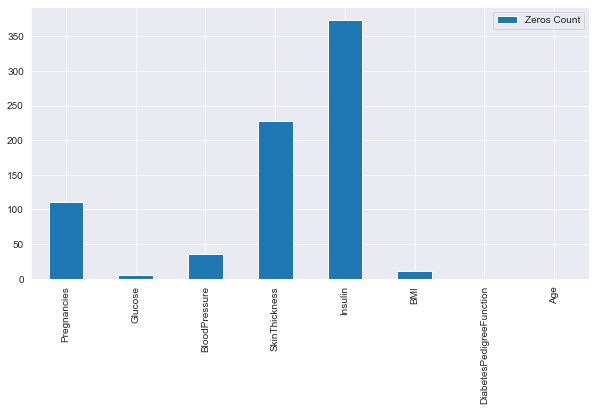

In [74]:
# 0값의 분포
z=(df == 0).sum(axis=0)
z=pd.DataFrame(z)
print(z.head(10))
z.columns=['Zeros Count']
print(z.head(10))
z.drop('Outcome',inplace=True)
z.plot(kind='bar',stacked=True, figsize=(10,5),grid=True)

In [ ]:
# # 0값을 검사할 피처명 리스트 객체 설정
# zero_features = ['Glucose', 'BloodPressure','SkinThickness','Insulin','BMI']

# # 전체 데이터 건수
# total_count = df['Glucose'].count()
# print(f'total_count{total_count}')

# # 피처별로 반복 하면서 데이터 값이 0 인 데이터 건수 추출하고, 퍼센트 계산
# for feature in zero_features:
#     zero_count = df[df[feature] == 0][feature].count()
#     print(f'{feature} 0값 건수는 {zero_count}, 퍼센트는 {100*zero_count/total_count:.2f} %')

#### 중앙값을 찾아 0값을 대체할 경우 코드

In [ ]:
# target값에 0, 1이 아니라 object로 되었을 때 ==> label encoder
# title_mapping = {'YES':1,'NO':0}
# df[' Class variable']=df[' Class variable'].map(title_mapping)

In [ ]:
# col=['Pregnancies','Glucose', 'BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction', 'Age', 'Outcome' ]
# df.columns=col
# df.head()

In [75]:
#0 제거 후 nan 으로 변환 # np.nan의 type : float
col=['Glucose', 'BloodPressure','SkinThickness','Insulin','BMI' ]
for i in col:
    df[i].replace(0, np.nan, inplace= True)

In [76]:
#결과확인
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [77]:
# median 중앙값 찾기
def median_target(var):   
    temp = df[df[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [78]:
print(median_target('Glucose'))
print (median_target('Glucose')[ median_target('Glucose')['Outcome']==0]['Glucose'].values[0] )
median_target('Glucose')[ median_target('Glucose')['Outcome']==1]['Glucose'].values[0]

   Outcome  Glucose
0        0    107.0
1        1    140.0
107.0


140.0

In [79]:
median_target('BloodPressure')

,Outcome,BloodPressure
0,0,70.0
1,1,74.5


In [80]:

median_target('SkinThickness')

,Outcome,SkinThickness
0,0,27.0
1,1,32.0


In [81]:
median_target('Insulin')

,Outcome,Insulin
0,0,102.5
1,1,169.5


In [82]:
median_target('BMI')

,Outcome,BMI
0,0,30.1
1,1,34.3


##### # 중간값으로 Outcome의 0, 1에 각각 처리할 경우 코드 

In [83]:
# NaN 채워넣기
df.loc[(df['Outcome'] == 0 ) & (df['Glucose'].isnull()), 'Glucose'] = median_target('Glucose')[ median_target('Glucose')['Outcome']==0]['Glucose'].values[0]
df.loc[(df['Outcome'] == 1 ) & (df['Glucose'].isnull()), 'Glucose'] = median_target('Glucose')[ median_target('Glucose')['Outcome']==1]['Glucose'].values[0]
df.loc[(df['Outcome'] == 0 ) & (df['BloodPressure'].isnull()), 'BloodPressure'] = median_target('BloodPressure')[ median_target('BloodPressure')['Outcome']==0]['BloodPressure'].values[0]
df.loc[(df['Outcome'] == 1 ) & (df['BloodPressure'].isnull()), 'BloodPressure'] = median_target('BloodPressure')[ median_target('BloodPressure')['Outcome']==1]['BloodPressure'].values[0]
df.loc[(df['Outcome'] == 0 ) & (df['SkinThickness'].isnull()), 'SkinThickness'] = median_target('SkinThickness')[ median_target('SkinThickness')['Outcome']==0]['SkinThickness'].values[0]
df.loc[(df['Outcome'] == 1 ) & (df['SkinThickness'].isnull()), 'SkinThickness'] = median_target('SkinThickness')[ median_target('SkinThickness')['Outcome']==1]['SkinThickness'].values[0]
df.loc[(df['Outcome'] == 0 ) & (df['Insulin'].isnull()), 'Insulin'] =  median_target('Insulin')[ median_target('Insulin')['Outcome']==0]['Insulin'].values[0]
df.loc[(df['Outcome'] == 1 ) & (df['Insulin'].isnull()), 'Insulin'] = median_target('Insulin')[ median_target('Insulin')['Outcome']==1]['Insulin'].values[0]
df.loc[(df['Outcome'] == 0 ) & (df['BMI'].isnull()), 'BMI'] = median_target('BMI')[ median_target('BMI')['Outcome']==0]['BMI'].values[0]
df.loc[(df['Outcome'] == 1 ) & (df['BMI'].isnull()), 'BMI'] = median_target('BMI')[ median_target('BMI')['Outcome']==1]['BMI'].values[0]# 

In [84]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### 3. 이상치(아웃라이어) 처리

#### matplotlib 구조
* f, ax = plt.subplots(figsize=(11, 15))  ==> Figure 구조를 알아야 함
* https://zzsza.github.io/development/2018/08/24/data-visualization-in-python/

#### 한번에 이상치 모두 boxplot으로 표현하기

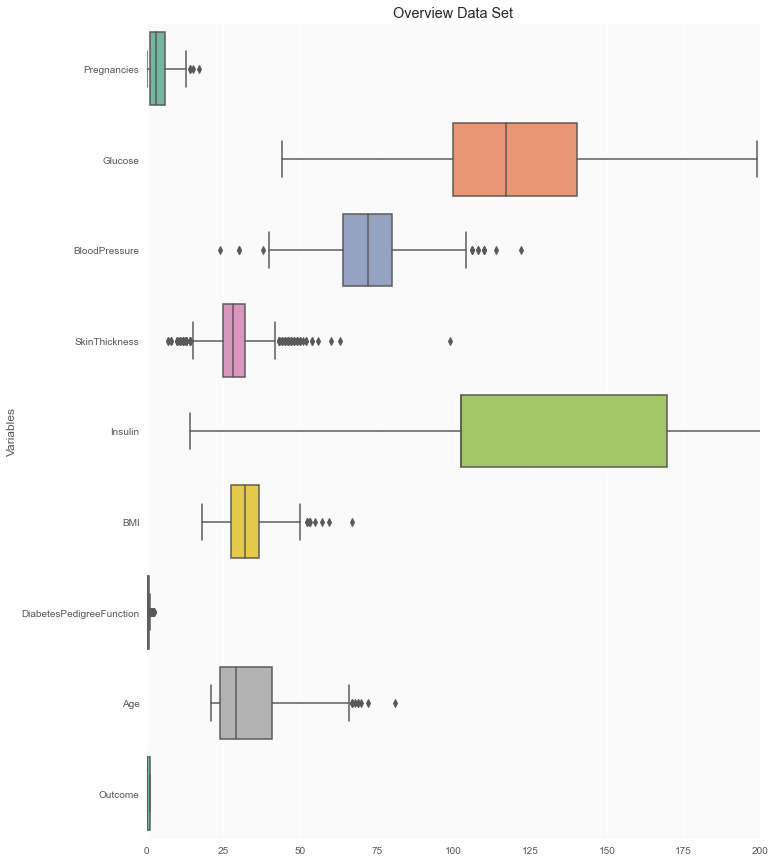

In [85]:
#아웃라이어를 찾기 위한 박스플롯
plt.style.use('ggplot') # Using ggplot2 style visuals 

f, ax = plt.subplots(figsize=(11, 15))

ax.set_facecolor('#fafafa')
ax.set(xlim=(-.05, 200))
plt.ylabel('Variables')
plt.title("Overview Data Set")

ax = sns.boxplot(data = df, 
  orient = 'h', 
  palette = 'Set2')

#### 이상치가 pima indian에게 나올수 있는 데이터라서 제거하지 않음
#### 아래코드는 중간값을 활용하여 이상치(아웃라이어) 제거시 코드

C:\Users\spiso\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0     111
1     135
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
12      9
13     10
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

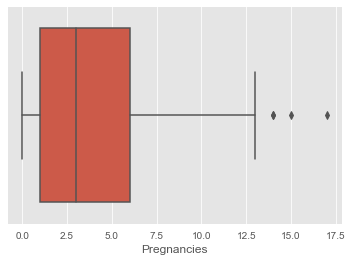

In [86]:
#중간값을 활용한 아웃라이어 제거
sns.boxplot(df.Pregnancies)

df['Pregnancies'].value_counts().sort_index()

In [87]:
median_target('Pregnancies')

,Outcome,Pregnancies
0,0,2
1,1,4


In [88]:
# #인위조정 : 임신횟수 : 이상치 발생가능성 있어 적용하지 않음
# df.loc[(df['Outcome'] == 0 ) & (df['Pregnancies']>13), 'Pregnancies'] = median_target('Pregnancies')[ median_target('Pregnancies')['Outcome']==0]['Pregnancies'].values[0]
# df.loc[(df['Outcome'] == 1 ) & (df['Pregnancies']>13), 'Pregnancies'] = median_target('Pregnancies')[ median_target('Pregnancies')['Outcome']==1]['Pregnancies'].values[0]

# 동일한 슬라이싱
# df[(df['Outcome'] == 1 ) & (df['Pregnancies']>13)]['Pregnancies'] = 4

C:\Users\spiso\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


44.0     1
56.0     1
57.0     2
61.0     1
62.0     1
        ..
195.0    2
196.0    3
197.0    4
198.0    1
199.0    1
Name: Glucose, Length: 135, dtype: int64

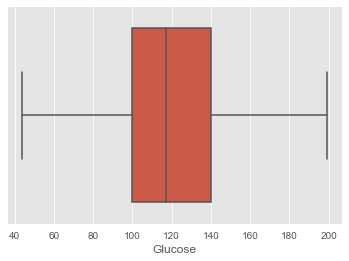

In [89]:
sns.boxplot(df.Glucose)
df['Glucose'].value_counts().sort_index()

C:\Users\spiso\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


24.0      1
30.0      2
38.0      1
40.0      1
44.0      4
46.0      2
48.0      5
50.0     13
52.0     11
54.0     11
55.0      2
56.0     12
58.0     21
60.0     37
61.0      1
62.0     34
64.0     43
65.0      7
66.0     30
68.0     45
70.0     76
72.0     44
74.0     52
74.5     16
75.0      8
76.0     39
78.0     45
80.0     40
82.0     30
84.0     23
85.0      6
86.0     21
88.0     25
90.0     22
92.0      8
94.0      6
95.0      1
96.0      4
98.0      3
100.0     3
102.0     1
104.0     2
106.0     3
108.0     2
110.0     3
114.0     1
122.0     1
Name: BloodPressure, dtype: int64

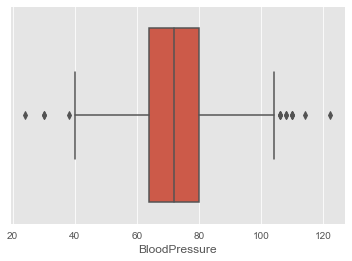

In [90]:
sns.boxplot(df.BloodPressure)
df['BloodPressure'].value_counts().sort_index()

In [91]:
median_target('BloodPressure')

,Outcome,BloodPressure
0,0,70.0
1,1,74.5


In [92]:
# # 인위조정 이상치 발생가능성 있어 적용하지 않음
# df.loc[(df['Outcome'] == 0 ) & (df['BloodPressure']<40), 'BloodPressure'] = 70
# df.loc[(df['Outcome'] == 1 ) & (df['BloodPressure']<40), 'BloodPressure'] = 74.5

C:\Users\spiso\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


24.0      1
30.0      2
38.0      1
40.0      1
44.0      4
46.0      2
48.0      5
50.0     13
52.0     11
54.0     11
55.0      2
56.0     12
58.0     21
60.0     37
61.0      1
62.0     34
64.0     43
65.0      7
66.0     30
68.0     45
70.0     76
72.0     44
74.0     52
74.5     16
75.0      8
76.0     39
78.0     45
80.0     40
82.0     30
84.0     23
85.0      6
86.0     21
88.0     25
90.0     22
92.0      8
94.0      6
95.0      1
96.0      4
98.0      3
100.0     3
102.0     1
104.0     2
106.0     3
108.0     2
110.0     3
114.0     1
122.0     1
Name: BloodPressure, dtype: int64

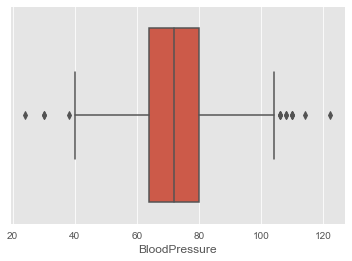

In [93]:
sns.boxplot(df.BloodPressure)
df['BloodPressure'].value_counts().sort_index()

C:\Users\spiso\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


7.0       2
8.0       2
10.0      5
11.0      6
12.0      7
13.0     11
14.0      6
15.0     14
16.0      6
17.0     14
18.0     20
19.0     18
20.0     13
21.0     10
22.0     16
23.0     22
24.0     12
25.0     16
26.0     16
27.0    162
28.0     20
29.0     17
30.0     27
31.0     19
32.0    119
33.0     20
34.0      8
35.0     15
36.0     14
37.0     16
38.0      7
39.0     18
40.0     16
41.0     15
42.0     11
43.0      6
44.0      5
45.0      6
46.0      8
47.0      4
48.0      4
49.0      3
50.0      3
51.0      1
52.0      2
54.0      2
56.0      1
60.0      1
63.0      1
99.0      1
Name: SkinThickness, dtype: int64

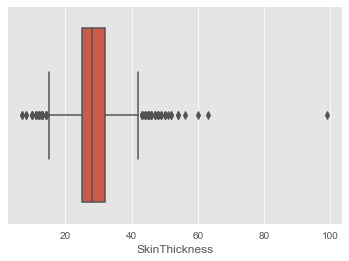

In [94]:
sns.boxplot(df.SkinThickness)
df['SkinThickness'].value_counts().sort_index()

In [95]:
# df.loc[(df['Outcome'] == 0 ) & (df['SkinThickness']>38), 'SkinThickness'] = 27
# df.loc[(df['Outcome'] == 1 ) & (df['SkinThickness']>38), 'SkinThickness'] = 32
# df.loc[(df['Outcome'] == 0 ) & (df['SkinThickness']<20), 'SkinThickness'] = 27
# df.loc[(df['Outcome'] == 1 ) & (df['SkinThickness']<20), 'SkinThickness'] = 32

C:\Users\spiso\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


14.0     1
15.0     1
16.0     1
18.0     2
22.0     1
        ..
579.0    1
600.0    1
680.0    1
744.0    1
846.0    1
Name: Insulin, Length: 187, dtype: int64

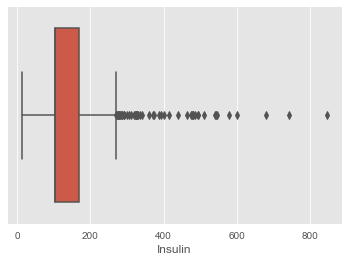

In [96]:
sns.boxplot(df.Insulin)
df['Insulin'].value_counts().sort_index()

In [ ]:
# 동일한 방식으로 이상치 대체

In [ ]:
# ['Pregnancies','Glucose', 'BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction', 'Age', 'Outcome' ]